## Final Project Submission

Please fill out:
* Student name: James Benedito
* Student pace: Part Time
* Instructor name: Morgan Jones

## Introduction

Driving through a suburban neighborhood, it's inevitable that one will encounter at least one "for sale" sign. These signs typically have the logo of some big-time real estate company, like Century 21 or REMAX. Real estate companies are businesses that deal with buying and selling properties. When purchasing a house, everyone has their non-negotiables. Some people want a big kitchen or backyard. Others may want a basement or 'x' amount of bathrooms. In this Jupyter notebook, I will explore the different variables that impact a home's value. The information in this analysis will be applicable to real estate companies who sell houses to clients.

## Business Problem

King County is a county located in Washington state with a population of approximately 2.2 million people, according to the 2022 US Census. As of 2021, the median household income is about $106,000 (https://www.census.gov/quickfacts/kingcountywashington).

A theoretical real estate company in King County sells homes. They want to be informed and know the factors that increase a house's value. My data analysis will bring light to the variables that are most impactful to a home's sale price in King County and will thus inform this real estate company on the types of properties they should focus on selling.  

## Goal

My goal is to come up with three concrete suggestions based on a linear regression analysis. The final linear regression model will include the three variables that are most impactful to a house's sale price, which will serve as the dependent variable of interest throughout the entire exploration process. In other words, the independent variables in my final model will be those that are the best predictors of a house's sale price (the dependent variable). 

## Dataset

The dataset I am using for the analysis is kc_house_data.csv. This dataset includes data on houses in King County, which is where the theoretical real estate company and their clients are located.

## Dataset Exploration

I will begin by exploring the dataset, using the .head() method to visualize the first five rows in a table format. Furthermore, I will use the .info() and .describe() methods to get a better understanding of the overall dataset.

In [1]:
# importing relevant packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
# initial exploration of dataset
house_data = pd.read_csv('data\\kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

From the .info() method, we see that there are 25 columns in the dataset. The heat_source and sewer_system columns have missing values. In terms of dtype, the dataset contains a mix of integers, float values, and objects (strings).

In [4]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


The .describe() method shows statistics for 15 columns, which are of dtype integer or float. The columns containing object dtypes are not included in the table generated above.

Next, I will perform a correlation between sale price and the integer and float variables to see which variables may have a linear relationship with price. I will use the .corr() method to do this.

In [5]:
# performing correlation between price and potential independent variables (int and float dtypes)
house_data.corr()['price']

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

Based on the results from .corr(), it appears that sqft_living has the strongest correlation with price (r=0.61). This sqft_living variable may be useful for a baseline model.

## Baseline Model

As mentioned previously, sqft_living will be utilized for my simple linear regression baseline model. I will start by plotting the relationship between sqft_living and price. Then, I will generate the baseline model.

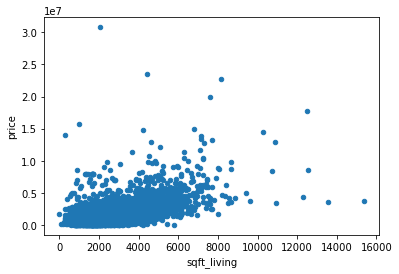

In [6]:
# scatterplot to visualize relationship between sqft_living and price
house_data.plot.scatter(x='sqft_living', y='price');

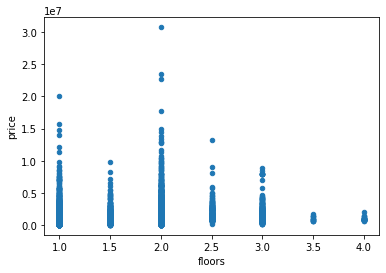

In [74]:
house_data.plot.scatter(x='floors', y='price');

In [77]:
# generating baseline model
y = house_data["price"]
X_baseline = house_data[["sqft_living"]]

In [78]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        21:08:15   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

From the baseline model we see that the model is statistically significant overall (the p-value for the F-statistic is 0). According to the model, one unit increase in sqft_living will lead to about a $560 in price. The p-values for both the constant and the sqft_living coefficient are significant (both t-test p-values are 0). Based on the r-squared value, we know that the model explains only about 37% of the variance in price. Therefore, this isn't a strong model and needs to be improved further.

## Second Model

For the second model, let's add another variable to see if it improves the R-squared value. From .corr(), we know that sqft_above had the second-highest correlation with price (r=0.54). I will create a second model with the sqft_living and sqft_above variables.

In [9]:
X_second = house_data[['sqft_living', 'sqft_above']]
X_second

,sqft_living,sqft_above
0,1180,1180
1,2770,1570
2,2880,1580
3,2160,1090
4,1120,1120
...,...,...
30150,1910,1600
30151,2020,2020
30152,1620,940
30153,2570,1830


In [10]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     8866.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        20:42:25   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.983e+05
Df Residuals:                   30152   BIC:                         8.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.486e+04   9863.317     -7.590      

This second model is not an improvement from the baseline model. The R-squared value is the same (0.37). In addition, the p-value for the sqft_above variable is not statisically significant (p=0.73) and is way higher than an alpha threshold of 0.05. 

Because the highest correlated numerical variables of integer and float dtypes failed to produce a strong model (one that predicts most of the variance in house price), I will now turn my attention to the categorical variables in the dataset.

## Categorical Variables

For the columns containing categorical information, the data needs to be one-hot encoded first before a model can be generated. Let's create a copy of the data table with only variables of object dtype present.

In [11]:
# creating copy of data with only obj columns
categorical_data = house_data.select_dtypes(include='object')
# use .head() to visualize first five rows and confirm that only categorical variables are present
categorical_data.head()

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [12]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          30155 non-null  object
 1   waterfront    30155 non-null  object
 2   greenbelt     30155 non-null  object
 3   nuisance      30155 non-null  object
 4   view          30155 non-null  object
 5   condition     30155 non-null  object
 6   grade         30155 non-null  object
 7   heat_source   30123 non-null  object
 8   sewer_system  30141 non-null  object
 9   address       30155 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


Using the .info() method, we can confirm that the copied dataframe contains only the columns of object dtype. As mentioned earlier, the heat_source and sewer_system columns have missing entries. Therefore, it's probably best not to include those two columns. In addition, it would not make sense to look at date and address and their relationship with price, since both of these data vary too much and will most likely not have any discernable pattern. Let's create a new copy of the categorical dataframe that excludes these four columns (heat_source, sewer_system, date, address). I will also add the price column because it's the dependent variable of interest.

In [13]:
# create another copy of categorical dataframe, excluding unnecessary columns
categorical_data_cut = house_data[['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'price']]
# use .head() to visualize first five rows
categorical_data_cut.head()

,waterfront,greenbelt,nuisance,view,condition,grade,price
0,NO,NO,NO,NONE,Good,7 Average,675000.0
1,NO,NO,YES,AVERAGE,Average,7 Average,920000.0
2,NO,NO,NO,AVERAGE,Average,7 Average,311000.0
3,NO,NO,NO,AVERAGE,Average,9 Better,775000.0
4,NO,NO,YES,NONE,Average,7 Average,592500.0


With the six columns that are left in the categorical dataframe, some edits most be done to make the data more usable. Let's start by creating a new column called rating that extracts the number from grade. 

In [14]:
# creating a new column with just the number from grade
categorical_data_cut['rating'] = categorical_data_cut['grade'].str.split().apply(lambda x: x[0])
categorical_data_cut

<ipython-input-14-7bd584cf5146>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_cut['rating'] = categorical_data_cut['grade'].str.split().apply(lambda x: x[0])


,waterfront,greenbelt,nuisance,view,condition,grade,price,rating
0,NO,NO,NO,NONE,Good,7 Average,675000.0,7
1,NO,NO,YES,AVERAGE,Average,7 Average,920000.0,7
2,NO,NO,NO,AVERAGE,Average,7 Average,311000.0,7
3,NO,NO,NO,AVERAGE,Average,9 Better,775000.0,9
4,NO,NO,YES,NONE,Average,7 Average,592500.0,7
...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,1555000.0,8
30151,NO,NO,NO,FAIR,Average,7 Average,1313000.0,7
30152,NO,NO,YES,NONE,Average,7 Average,800000.0,7
30153,NO,NO,NO,NONE,Average,8 Good,775000.0,8


In [15]:
categorical_data_cut['rating'].value_counts()

7     11697
8      9410
9      3806
6      2858
10     1371
11      406
5       393
12      122
4        51
13       24
3        13
1         2
2         2
Name: rating, dtype: int64

In [16]:
categorical_data_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  30155 non-null  object 
 1   greenbelt   30155 non-null  object 
 2   nuisance    30155 non-null  object 
 3   view        30155 non-null  object 
 4   condition   30155 non-null  object 
 5   grade       30155 non-null  object 
 6   price       30155 non-null  float64
 7   rating      30155 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.8+ MB


Let's convert rating from an object dtype to an integer so its relationship with price can be graphed.

In [17]:
# convert rating to int dtype
categorical_data_cut['rating'] = categorical_data_cut['rating'].astype('int64')

<ipython-input-17-7e85f699e4dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_cut['rating'] = categorical_data_cut['rating'].astype('int64')


In [18]:
# checking if dtype of rating was converted successfully
categorical_data_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  30155 non-null  object 
 1   greenbelt   30155 non-null  object 
 2   nuisance    30155 non-null  object 
 3   view        30155 non-null  object 
 4   condition   30155 non-null  object 
 5   grade       30155 non-null  object 
 6   price       30155 non-null  float64
 7   rating      30155 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.8+ MB


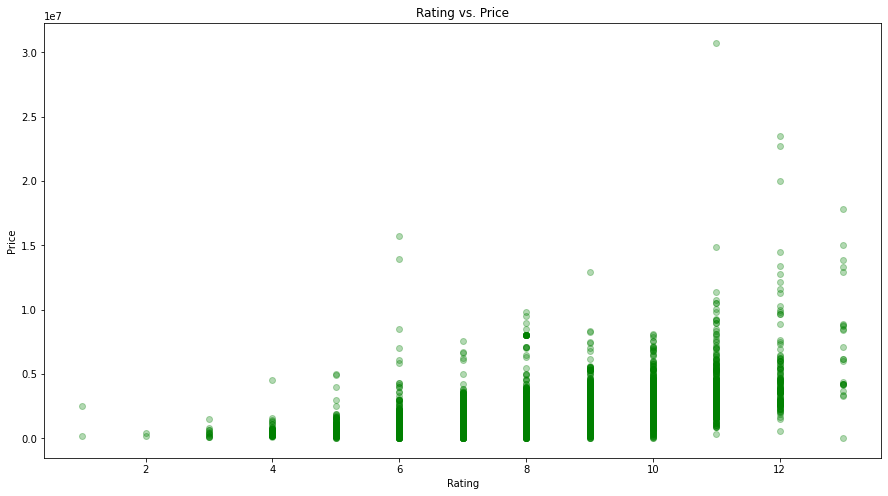

In [19]:
# creating scatterplot to visualize relationship between rating and price
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(categorical_data_cut['rating'], categorical_data_cut['price'], alpha=0.3, color="green")
ax.set_title("Rating vs. Price")
ax.set_xlabel("Rating")
ax.set_ylabel("Price");

In [20]:
y = categorical_data_cut["price"]
X_rating = categorical_data_cut[["rating"]]

rating_model = sm.OLS(y, sm.add_constant(X_rating))
rating_results = rating_model.fit()

print(rating_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 1.416e+04
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        20:42:26   Log-Likelihood:            -4.5029e+05
No. Observations:               30155   AIC:                         9.006e+05
Df Residuals:                   30153   BIC:                         9.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.266e+06   2.87e+04    -79.012      0.0

The linear regression model with rating as the only independent variable is weak, having an R-squared value of about 0.32 and an F-statistic p-value of 0, indicating significance at an alpha of 0.05. This model is actually worse at predicting the variance in price than the baseline and second model created earlier because it only accounts for about 32% of the variation, whereas the baseline and second model detected about 37% of the variation in price.

Let's take a look at some of the other categorical variables.

In [21]:
categorical_data_cut['waterfront'].value_counts()

NO     29636
YES      519
Name: waterfront, dtype: int64

In [22]:
categorical_data_cut['greenbelt'].value_counts()

NO     29382
YES      773
Name: greenbelt, dtype: int64

In [23]:
categorical_data_cut['nuisance'].value_counts()

NO     24893
YES     5262
Name: nuisance, dtype: int64

In [24]:
categorical_data_cut['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [25]:
categorical_data_cut['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

Looking at the value_counts for the other categorical variables, it appears that greenbelt, nuisance, and view are binary, having two categories ('NO' and 'YES'). Meanwhile, view and condition have five categories.

Let's create some bar graphs to visualize average price in relation to each variable.

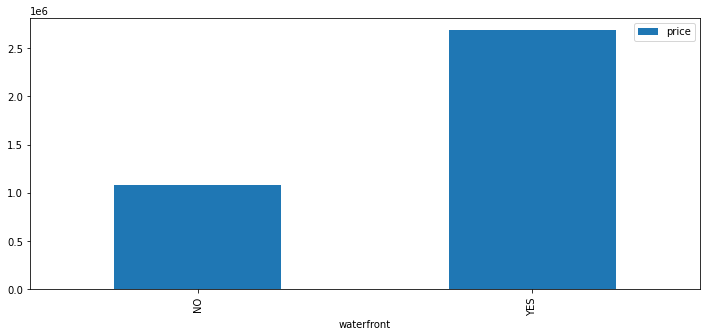

In [26]:
# waterfront vs price
fig, ax = plt.subplots(figsize=(12,5))
categorical_data_cut.groupby("waterfront").mean().plot.bar(y="price", ax=ax);

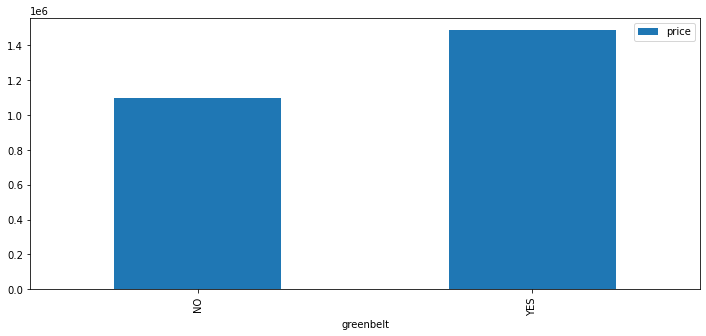

In [27]:
# greenbelt vs price
fig, ax = plt.subplots(figsize=(12,5))
categorical_data_cut.groupby("greenbelt").mean().plot.bar(y="price", ax=ax);

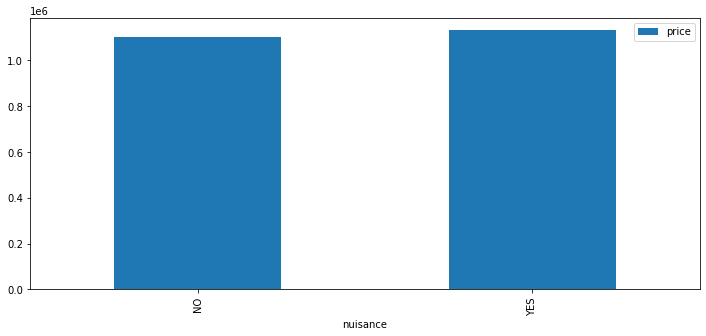

In [28]:
# nuisance vs price
fig, ax = plt.subplots(figsize=(12,5))
categorical_data_cut.groupby("nuisance").mean().plot.bar(y="price", ax=ax);

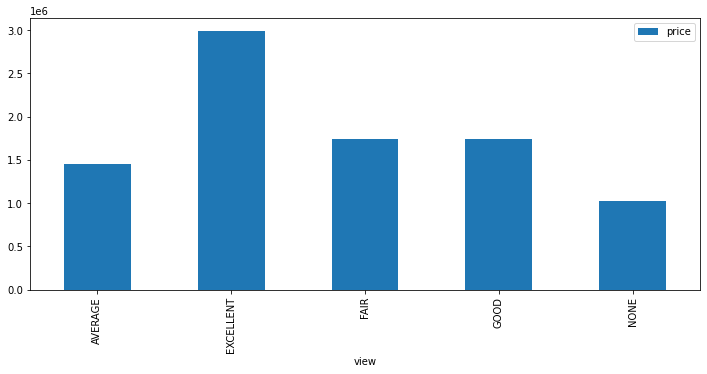

In [29]:
# view vs price
fig, ax = plt.subplots(figsize=(12,5))
categorical_data_cut.groupby("view").mean().plot.bar(y="price", ax=ax);

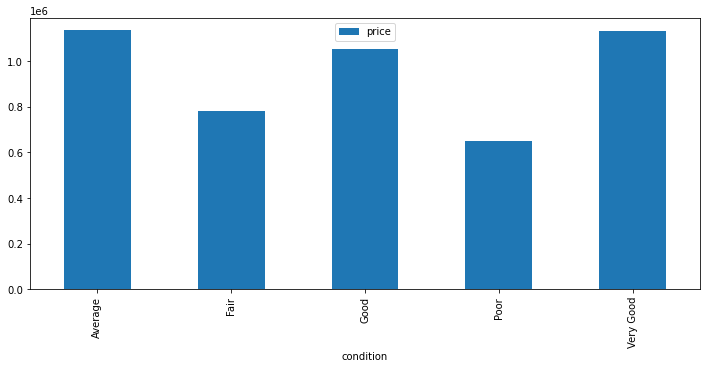

In [30]:
# condition vs price
fig, ax = plt.subplots(figsize=(12,5))
categorical_data_cut.groupby("condition").mean().plot.bar(y="price", ax=ax);

Looking at the three binary variables (waterfront, greenbelt, and nuisance), it appears that having a waterfront versus not having one makes a difference in mean price, having a greenbelt versus not having one makes a slight difference in mean price, and nuisance does not make much of a difference in mean price. Specifically, the presence of a waterfront and greenbelt generally increases the price of a home, simply based on the bar graph visualizations of the raw data. 

For view, houses rated 'excellent' had a higher mean price than those rated 'none'. For condition, houses with 'average', 'very good', and 'good' ratings had a greater mean price than those rated 'poor'. 

Let's create a linear regression model incorporating data from the waterfront, greenbelt, and view columns. However, before the model can be made, the words (dtype obj) in each column need to be converted into stand-in numbers (dtype int). 

In [31]:
# Adapted from Morgan Jones' code 
# https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb

from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable, while dropping any duplicates
le.fit(categorical_data_cut['waterfront'].drop_duplicates()) 
# create new waterfront variable with label encoded values
categorical_data_cut['waterfront'] = le.transform(categorical_data_cut['waterfront'])

# fit the label encoder to the greenbelt variable, while dropping any duplicates
le.fit(categorical_data_cut['greenbelt'].drop_duplicates()) 
# create new greenbelt variable with label encoded values
categorical_data_cut['greenbelt'] = le.transform(categorical_data_cut['greenbelt'])

# fit the label encoder to the nuisance variable, while dropping any duplicates
le.fit(categorical_data_cut['nuisance'].drop_duplicates()) 
# create new view variable with label encoded values
categorical_data_cut['nuisance'] = le.transform(categorical_data_cut['nuisance'])

# fit the label encoder to the view variable, while dropping any duplicates
le.fit(categorical_data_cut['view'].drop_duplicates()) 
# create new view variable with label encoded values
categorical_data_cut['view'] = le.transform(categorical_data_cut['view'])

# fit the label encoder to the condition variable, while dropping any duplicates
le.fit(categorical_data_cut['condition'].drop_duplicates()) 
# create new view variable with label encoded values
categorical_data_cut['condition'] = le.transform(categorical_data_cut['condition'])

<ipython-input-31-ab1e8fc6312a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_cut['waterfront'] = le.transform(categorical_data_cut['waterfront'])
<ipython-input-31-ab1e8fc6312a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_cut['greenbelt'] = le.transform(categorical_data_cut['greenbelt'])
<ipython-input-31-ab1e8fc6312a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [32]:
y = categorical_data_cut['price']
X = categorical_data_cut[["waterfront", "greenbelt", "nuisance", "view", "condition", "rating"]]
X

,waterfront,greenbelt,nuisance,view,condition,rating
0,0,0,0,4,2,7
1,0,0,1,0,0,7
2,0,0,0,0,0,7
3,0,0,0,0,0,9
4,0,0,1,4,0,7
...,...,...,...,...,...,...
30150,0,0,0,4,2,8
30151,0,0,0,2,0,7
30152,0,0,1,4,0,7
30153,0,0,0,4,0,8


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   waterfront  30155 non-null  int32
 1   greenbelt   30155 non-null  int32
 2   nuisance    30155 non-null  int32
 3   view        30155 non-null  int32
 4   condition   30155 non-null  int32
 5   rating      30155 non-null  int64
dtypes: int32(5), int64(1)
memory usage: 824.7 KB


We can see that the data in the waterfront, greenbelt, and view columns were successfully transformed. 

In [34]:
X['waterfront'].value_counts()

0    29636
1      519
Name: waterfront, dtype: int64

In [35]:
X['greenbelt'].value_counts()

0    29382
1      773
Name: greenbelt, dtype: int64

In [36]:
X['condition'].value_counts()

0    18547
2     8054
4     3259
1      230
3       65
Name: condition, dtype: int64

Using the .value_counts() method, we can figure out what each stand-in number represents by matching it up with the .value_counts() performed earlier for each variable in the categorical_data_cut dataframe.

For waterfront and greenbelt, '0' and '1' indicate 'NO' and 'YES' respectively. 

For view, it's a little more complicated:
- '4': 'NONE'
- '0': 'AVERAGE'
- '3': 'GOOD'
- '1': 'EXCELLENT'
- '2': 'FAIR'

Now that everything has been converted to integer stand-ins, we can use the pd.get_dummies function to create dummy variables and perform one-hot encoding. To avoid the dummy variable trap (perfect multicolinearity), we will pass in drop_first=True. Then, we can create our linear model.

In [37]:
X = pd.get_dummies(X, columns=["waterfront"], drop_first=True)
#X = X.drop("waterfront_1", axis=1)
X

,greenbelt,nuisance,view,condition,rating,waterfront_1
0,0,0,4,2,7,0
1,0,1,0,0,7,0
2,0,0,0,0,7,0
3,0,0,0,0,9,0
4,0,1,4,0,7,0
...,...,...,...,...,...,...
30150,0,0,4,2,8,0
30151,0,0,2,0,7,0
30152,0,1,4,0,7,0
30153,0,0,4,0,8,0


In [38]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     3082.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        20:42:30   Log-Likelihood:            -4.4888e+05
No. Observations:               30155   AIC:                         8.978e+05
Df Residuals:                   30148   BIC:                         8.978e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.047e+06    3.5e+04    -58.566   

In [39]:
y = categorical_data_cut['price']
X = categorical_data_cut[["waterfront", "condition", "rating"]]
X = pd.get_dummies(X, columns=["rating"], drop_first=True)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1722.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        20:42:30   Log-Likelihood:            -4.4724e+05
No. Observations:               30155   AIC:                         8.945e+05
Df Residuals:                   30140   BIC:                         8.946e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.328e+05   4.73e+05      1.550      0.1

In [40]:
# Adapted from Morgan Jones' code 
# https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb

from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable, while dropping any duplicates
le.fit(house_data['waterfront'].drop_duplicates()) 
# create new waterfront variable with label encoded values
house_data['waterfront'] = le.transform(house_data['waterfront'])

# fit the label encoder to the greenbelt variable, while dropping any duplicates
le.fit(house_data['greenbelt'].drop_duplicates()) 
# create new greenbelt variable with label encoded values
house_data['greenbelt'] = le.transform(house_data['greenbelt'])

# fit the label encoder to the nuisance variable, while dropping any duplicates
le.fit(house_data['nuisance'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['nuisance'] = le.transform(house_data['nuisance'])

# fit the label encoder to the view variable, while dropping any duplicates
le.fit(house_data['view'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['view'] = le.transform(house_data['view'])

# fit the label encoder to the condition variable, while dropping any duplicates
le.fit(house_data['condition'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['condition'] = le.transform(house_data['condition'])

In [41]:
house_data['rating'] = house_data['grade'].str.split().apply(lambda x: x[0])
house_data['rating'] = house_data['rating'].astype('int64')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,rating
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,7
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,7
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,7
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,9
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,7


In [42]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  int32  
 9   greenbelt      30155 non-null  int32  
 10  nuisance       30155 non-null  int32  
 11  view           30155 non-null  int32  
 12  condition      30155 non-null  int32  
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [81]:
y = house_data['price']
X = house_data[["sqft_living", "rating", "view"]]
X = pd.get_dummies(X, columns=["view"])
X = X.drop('view_3', axis=1)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     4051.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        21:08:42   Log-Likelihood:            -4.4718e+05
No. Observations:               30155   AIC:                         8.944e+05
Df Residuals:                   30148   BIC:                         8.944e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.498e+05   3.85e+04    -24.640      

## Conclusions

Three concrete suggestions based on final model

## Limitations and Future Improvements

Include assumptions of linear regression